In [37]:
library(data.table)

In [38]:
library(plyr)

In [39]:
library(ggplot2)

In [40]:
revisions_weighted_sums_and_page_views <- read.table("../../../results/misalignment_edit_types_tables_and_queries/revision_edit_and_agent_type_may_2016_to_2017_million_sampled_with_weighted_score_extracted.tsv", header=TRUE, sep="\t")

In [41]:
summary(revisions_weighted_sums_and_page_views)

   namespace             page_title           edit_type     
 Min.   :  0.00000   Q4115189 :    73   claim      :286785  
 1st Qu.:  0.00000   Q16943273:    35   NULL       :243932  
 Median :  0.00000   Q2289941 :    29   description:163555  
 Mean   :  0.09163   Q670933  :    28   reference  :121802  
 3rd Qu.:  0.00000   Q707063  :    28   label      :107075  
 Max.   :120.00000   Q28564101:    27   qualifier  : 37773  
                     (Other)  :997658   (Other)    : 36956  
               agent_type       page_views            rev_id         
 anon_edit          :  4735   Min.   :0.000e+00   Min.   :328006265  
 bot_edit           :553932   1st Qu.:2.300e+01   1st Qu.:359403690  
 human_edit         :124118   Median :3.220e+02   Median :395790002  
 semi_automated_edit:315093   Mean   :3.324e+05   Mean   :401584644  
                              3rd Qu.:2.965e+03   3rd Qu.:447017485  
                              Max.   :1.253e+10   Max.   :480380485  
                      

In [42]:
quantile(revisions_weighted_sums_and_page_views$page_views, probs=seq(0,1,.05))
quantile(revisions_weighted_sums_and_page_views$weighted_sum, probs=seq(0,1,.05))

0%           5%          10%          15%          20%          25% 
0.000000e+00 1.000000e+00 3.000000e+00 5.000000e+00 1.000000e+01 2.300000e+01 
         30%          35%          40%          45%          50%          55% 
4.200000e+01 7.095000e+01 1.250000e+02 2.070000e+02 3.220000e+02 4.930000e+02 
         60%          65%          70%          75%          80%          85% 
7.570000e+02 1.178000e+03 1.863000e+03 2.965000e+03 4.796600e+03 9.144000e+03 
         90%          95%         100% 
2.186900e+04 8.931680e+04 1.253037e+10

0%       5%      10%      15%      20%      25%      30%      35% 
1.003386 1.021239 1.058740 1.099369 1.146228 1.195305 1.238918 1.463098 
     40%      45%      50%      55%      60%      65%      70%      75% 
1.664103 1.893056 2.001295 2.155813 2.479205 2.844883 2.941738 2.972021 
     80%      85%      90%      95%     100% 
2.993933 3.024401 3.170230 3.492871 4.996667

In [43]:
# revisions_weighted_sums_and_page_views$pnorms = pnorm(revisions_weighted_sums_and_page_views$page_views, quantile(revisions_weighted_sums_and_page_views$page_views, probs=seq(0,1,.05)))

revisions_weighted_sums_and_page_views$expected_quality_quantile = ecdf(revisions_weighted_sums_and_page_views$page_views)(revisions_weighted_sums_and_page_views$page_view)
weighted_sum_distribution = ecdf(revisions_weighted_sums_and_page_views$weighted_sum)
revisions_weighted_sums_and_page_views$expected_quality = quantile(weighted_sum_distribution, probs=revisions_weighted_sums_and_page_views$expected_quality_quantile)
revisions_weighted_sums_and_page_views$quality_difference = revisions_weighted_sums_and_page_views$weighted_sum - revisions_weighted_sums_and_page_views$expected_quality





In [44]:
head(revisions_weighted_sums_and_page_views, n=50)

namespace,page_title,edit_type,agent_type,page_views,rev_id,weighted_sum,expected_quality_quantile,expected_quality,quality_difference
0,Q961984,label,semi_automated_edit,5865,384866845,3.256820,0.81745364,2.999180,0.257639939
0,Q28523039,claim,bot_edit,0,436032172,1.121641,0.03570176,1.008216,0.113425037
0,Q5181830,claim,bot_edit,73,407221625,3.015139,0.35345904,1.478327,1.536811617
0,Q1816973,claim,bot_edit,5257,386856127,2.932580,0.80824409,2.996747,-0.064167081
0,Q1043170,NULL,bot_edit,69430,450250380,3.258320,0.94313634,3.440690,-0.182369740
0,Q751876,label,human_edit,1883630,423739406,3.034103,0.99315748,3.893258,-0.859154941
0,Q22774002,reference,semi_automated_edit,2226,389678515,1.261753,0.71888247,2.957597,-1.695844280
0,Q26041223,NULL,bot_edit,2,359448584,1.003563,0.09532328,1.053685,-0.050122428
0,Q18098239,qualifier,bot_edit,300,333049118,1.217328,0.49189580,1.987004,-0.769676616
0,Q431050,claim,semi_automated_edit,12326,399116722,2.979580,0.86918441,3.053436,-0.073855912


In [45]:
summary(revisions_weighted_sums_and_page_views$quality_difference)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.599000 -0.505200 -0.007211 -0.002160  0.472700  2.811000 

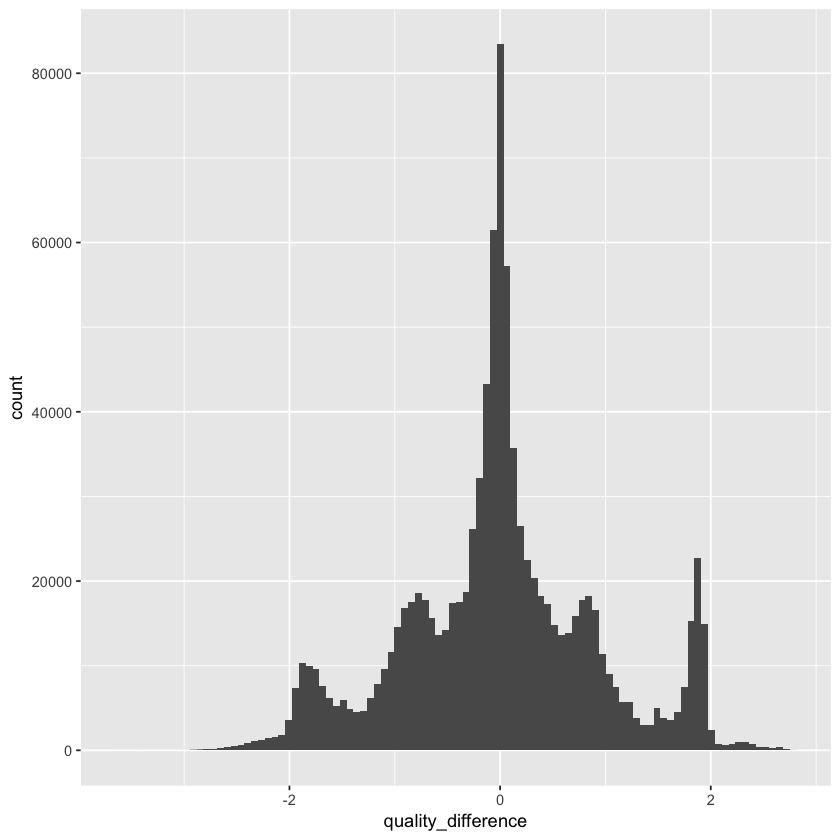

In [46]:
ggplot(revisions_weighted_sums_and_page_views,
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [49]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8200 -0.8119 -0.1384 -0.2574  0.1926  2.5530 

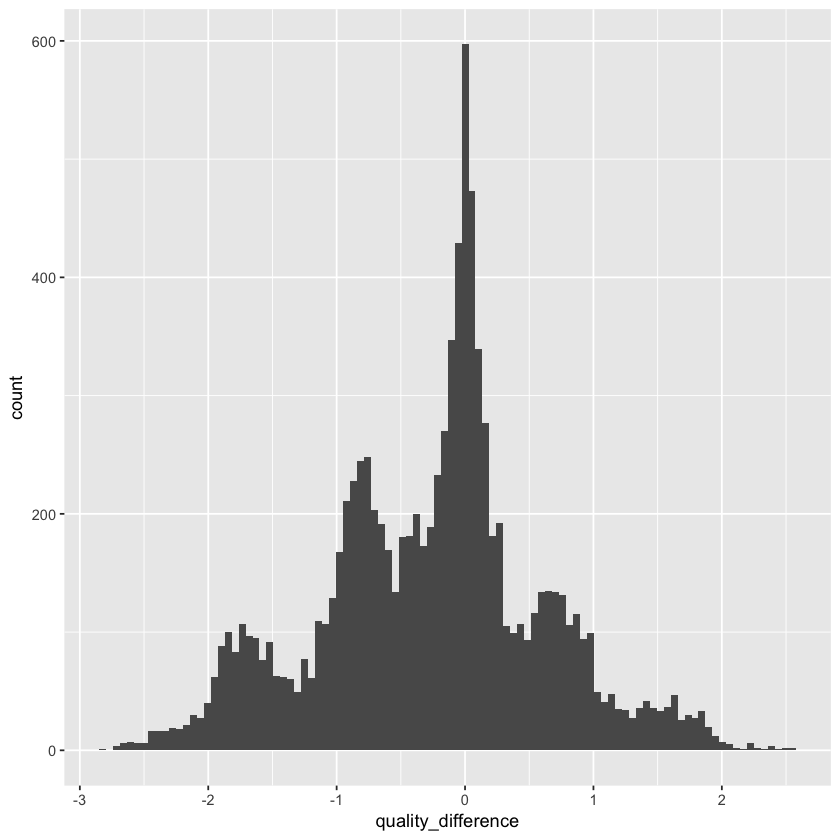

In [50]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [51]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.21300 -0.75280 -0.08132 -0.18790  0.24130  2.71800 

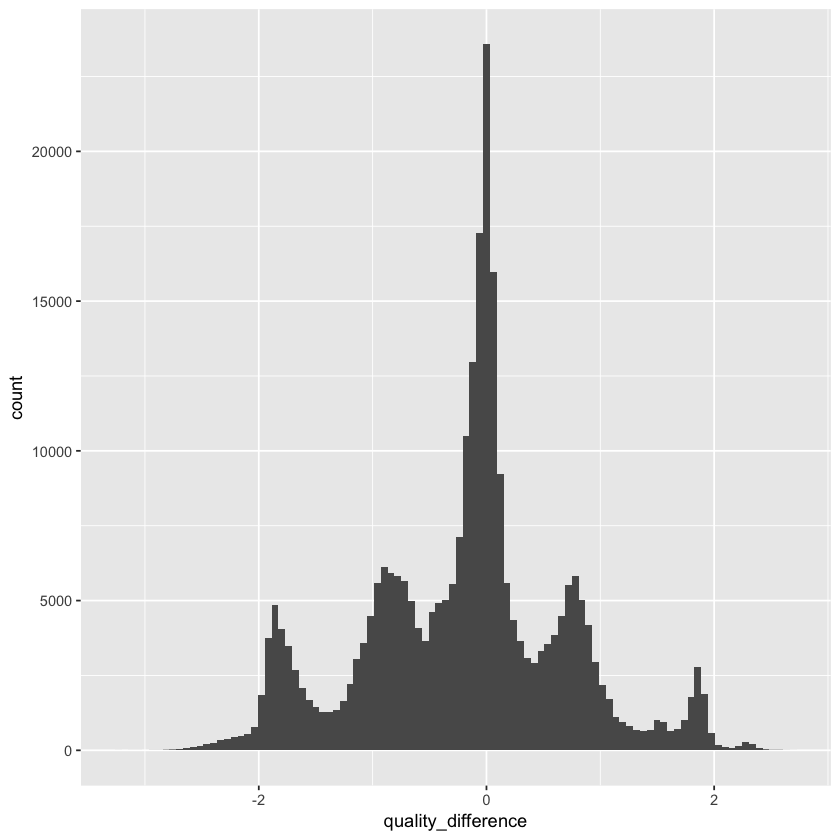

In [52]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [53]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.42900 -0.29620  0.05247  0.23630  0.82040  2.78200 

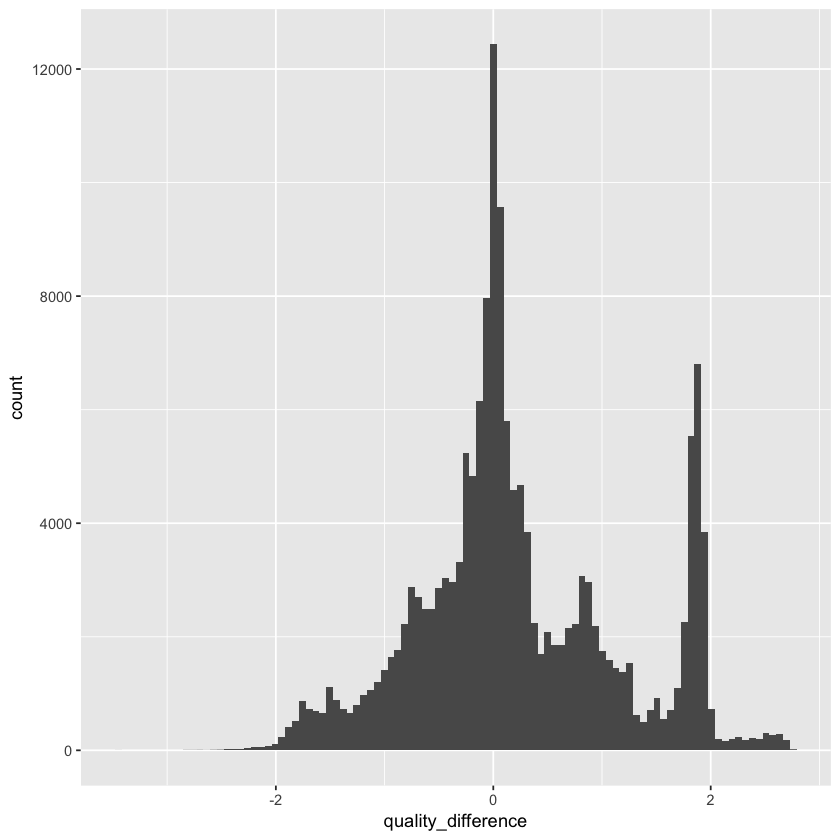

In [54]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [55]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.5990 -0.1164  0.3307  0.3604  0.9639  2.6190 

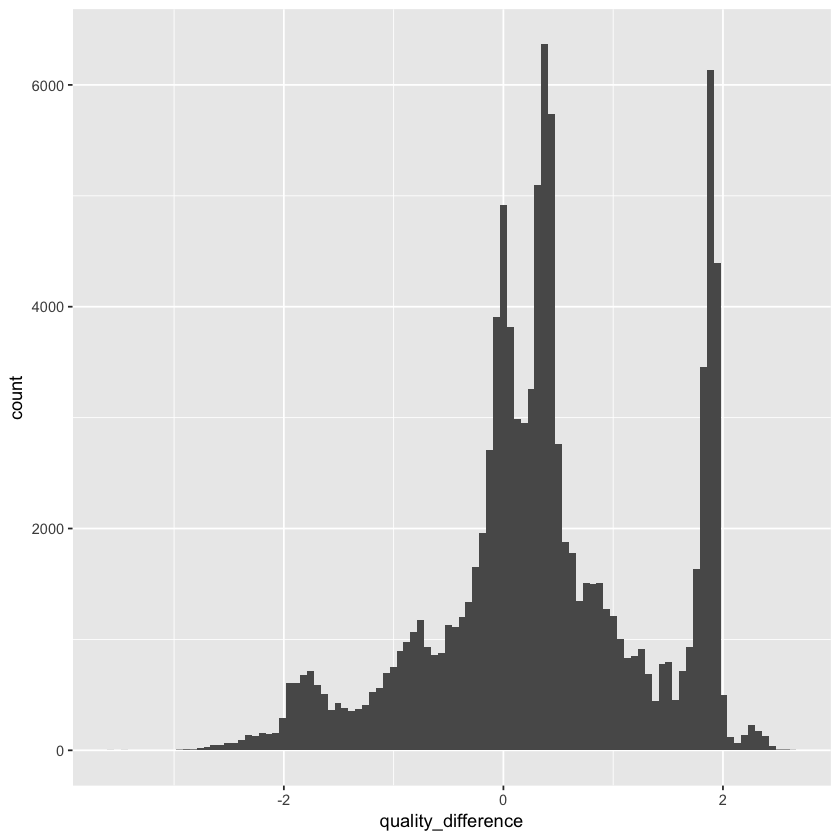

In [56]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [57]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.40900 -0.43280 -0.03687 -0.09030  0.21210  2.81100 

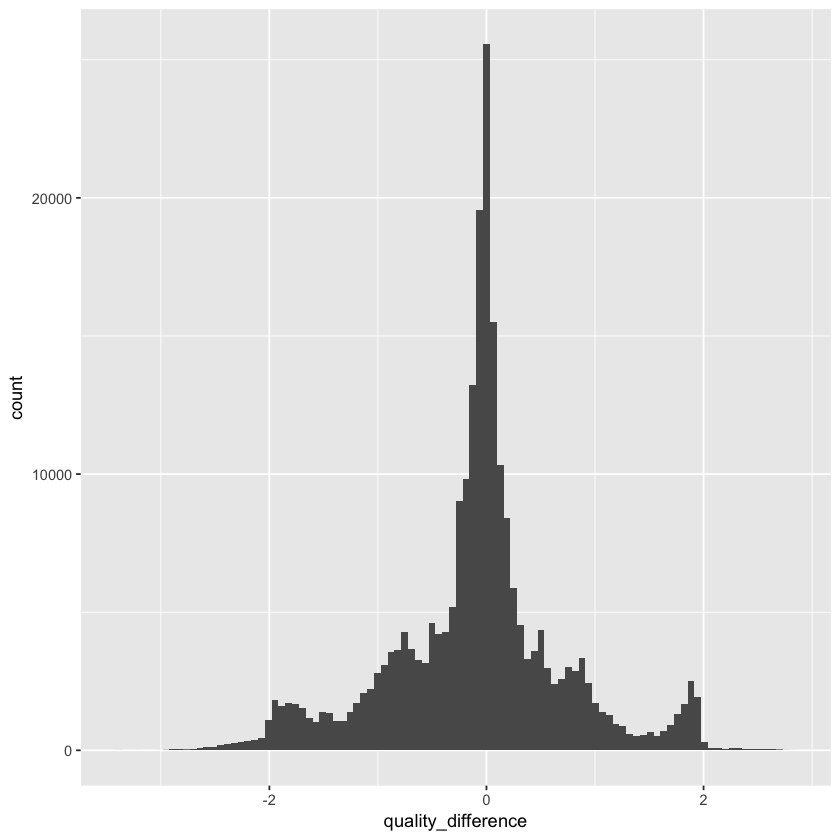

In [58]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [59]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.93100 -0.97560 -0.38650 -0.47990  0.01888  2.70700 

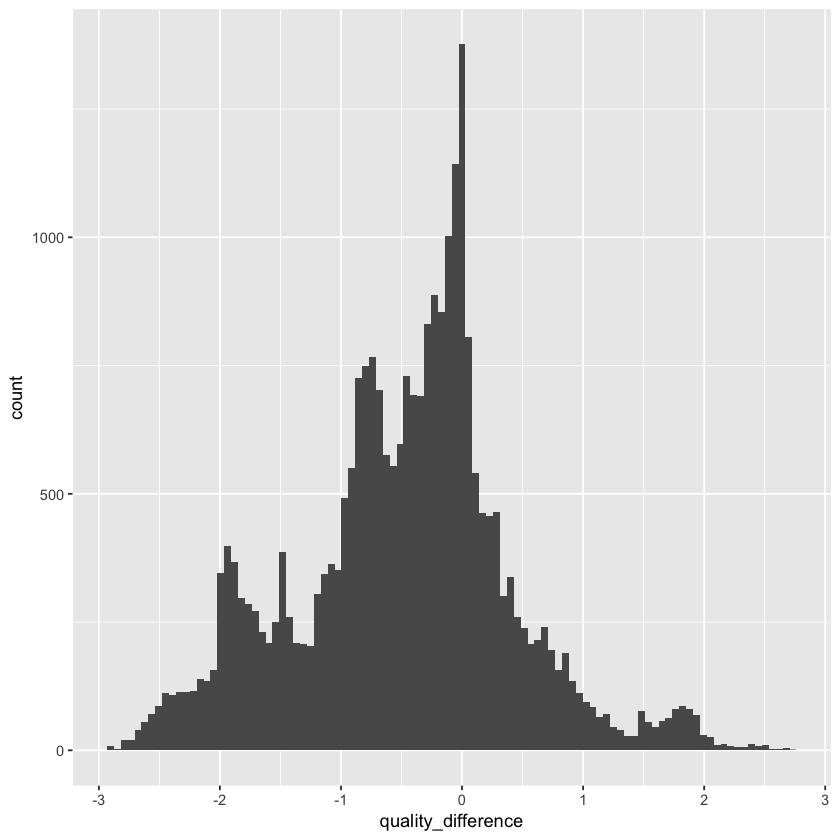

In [60]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [61]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference',]$quality_difference)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.846000 -0.648800  0.007230  0.001256  0.684800  2.698000 

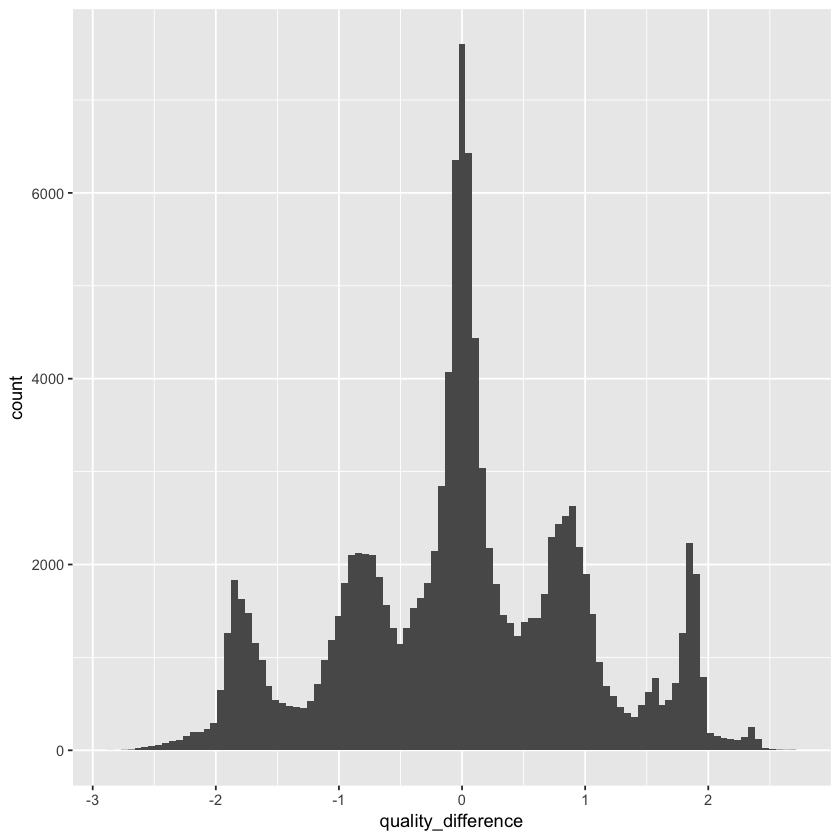

In [62]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [63]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.72800 -0.08253  0.13510  0.31510  0.84110  2.54400 

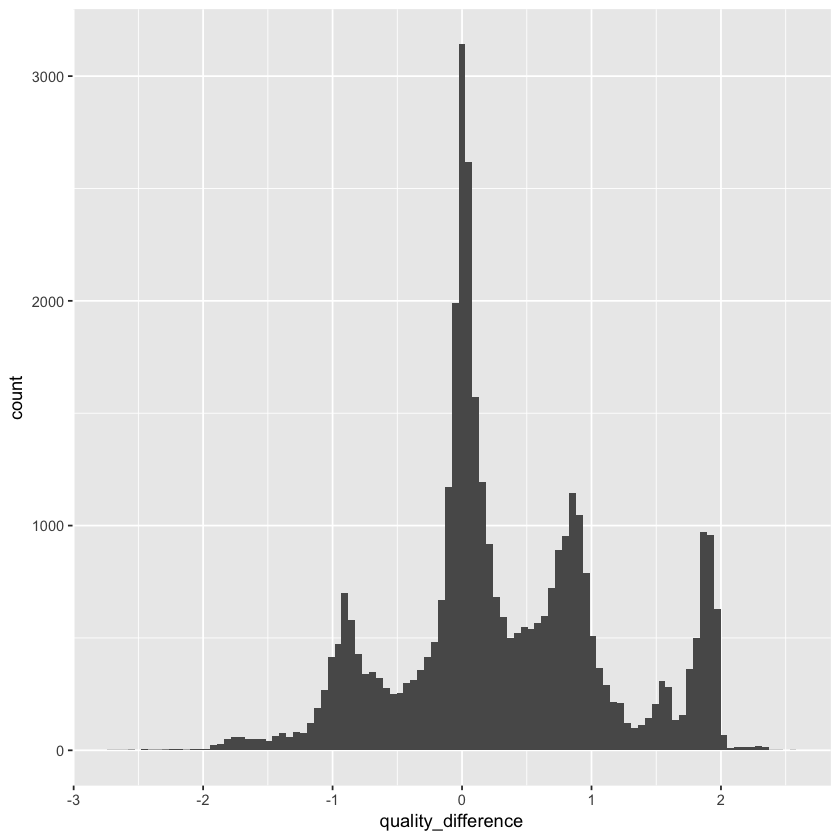

In [64]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [65]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.95800 -0.26430  0.03665  0.17670  0.71370  2.81100 

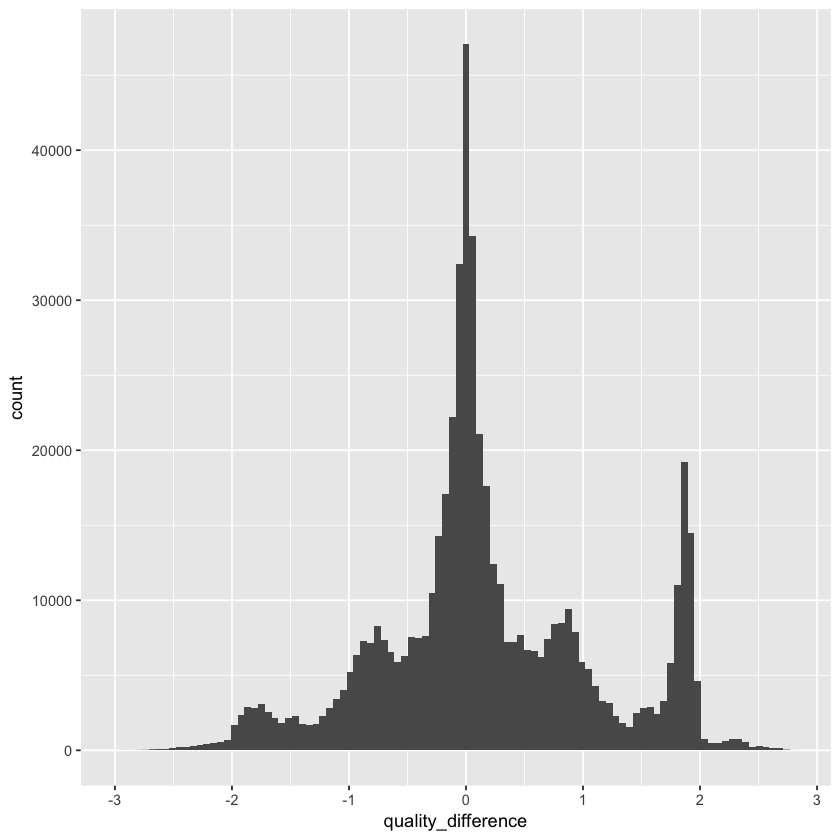

In [66]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [67]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.21300 -0.65870 -0.04377 -0.13650  0.37350  2.74300 

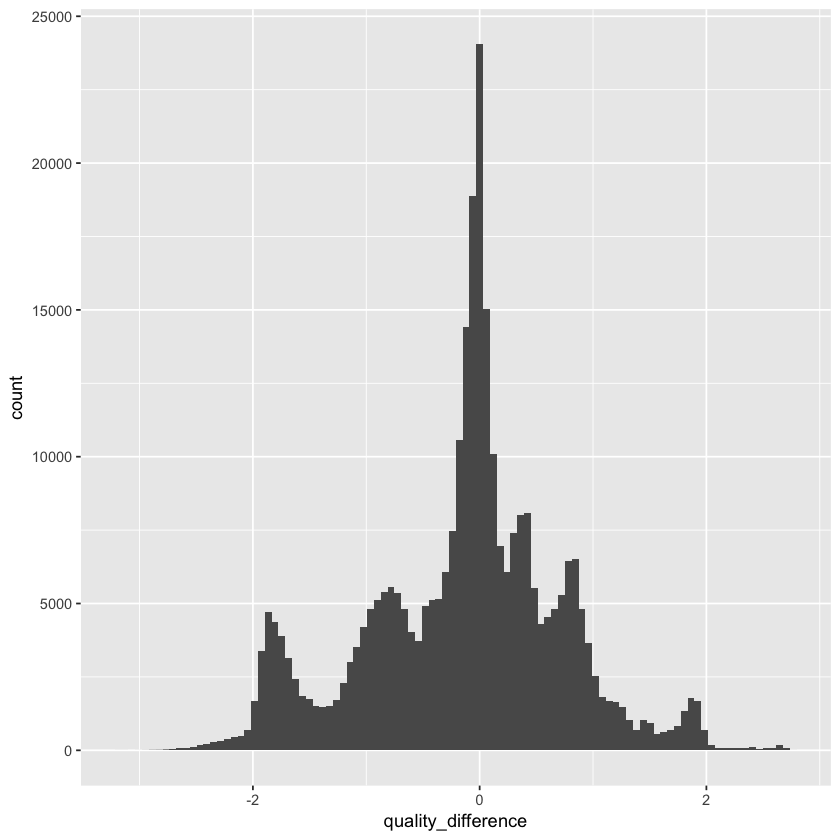

In [68]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [69]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'human_edit',]$quality_difference)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.59900 -0.94490 -0.32390 -0.43180  0.06898  2.70700 

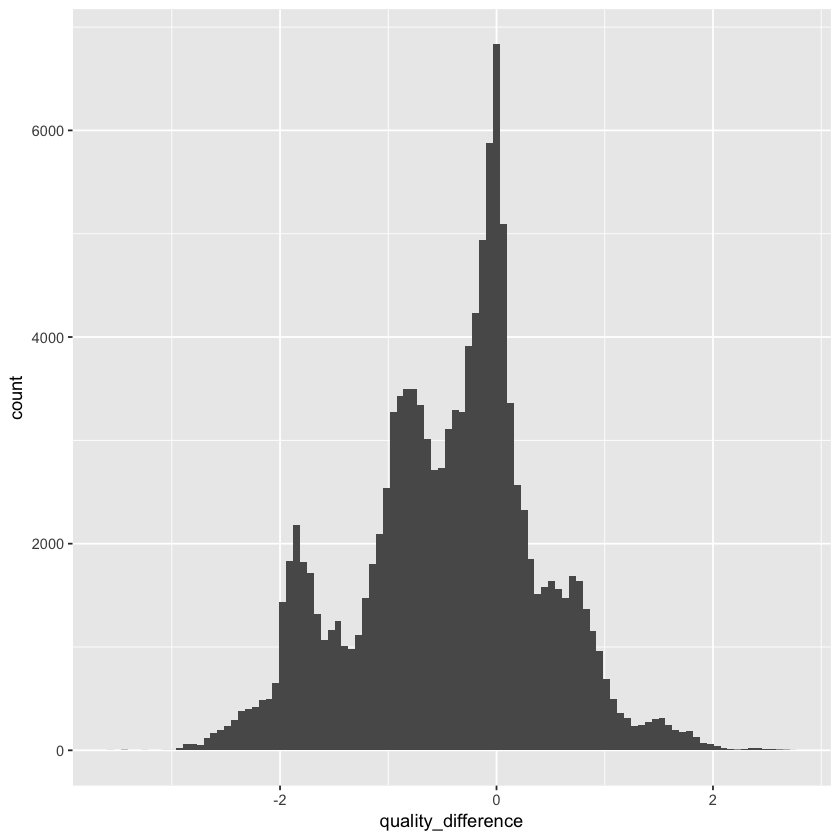

In [70]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [71]:
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',]$quality_difference)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.3630 -1.1770 -0.6757 -0.7271 -0.1433  1.7490 

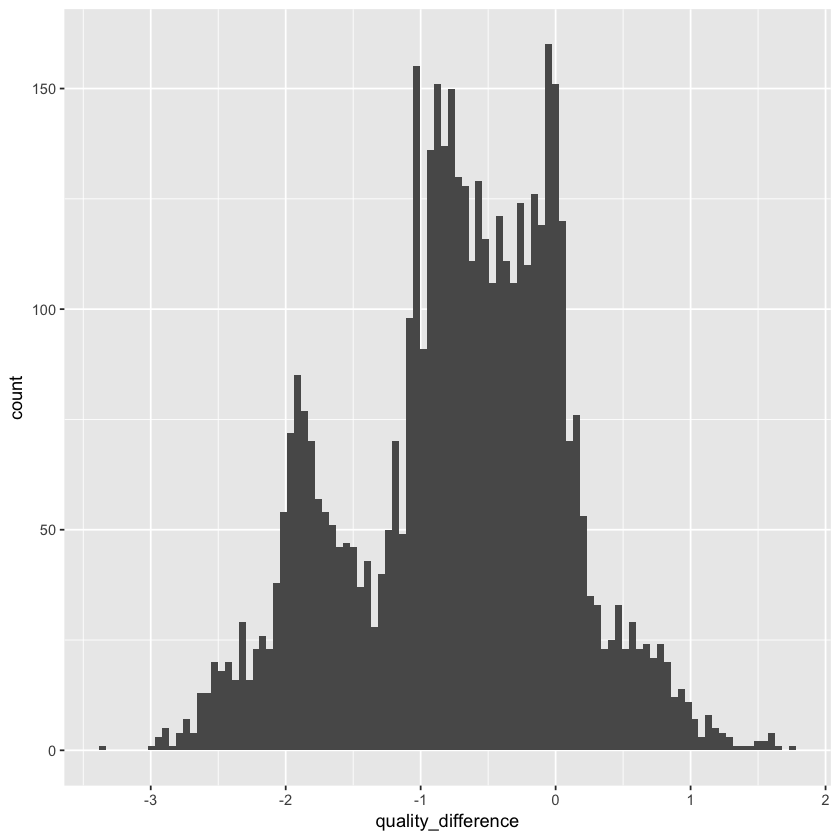

In [72]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

In [76]:
# bot edits
print("bots, sitelink")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
print("bots, aliases")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
print("bots, label")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
print("bots, description")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
print("bots, reference")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
print("bots, qualifier")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
print("bots, claim")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
print("bots, NULL")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',
                                                                      ]$quality_difference)
# semi automated edits
print("semi automated edits, sitelink")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, aliases")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, label")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, description")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, reference")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, qualifier")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, claim")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)
print("semi automated edits, NULL")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit'
                                                                      ,]$quality_difference)

# human edits
print("human edits, sitelink")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, aliases")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, label")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, description")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, reference")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, qualifier")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, claim")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)
print("human edits, NULL")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit'
                                                                      ,]$quality_difference)


# anon edits
print("anon edits, sitelink")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, aliases")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, label")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, description")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, reference")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, qualifier")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, claim")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)
print("anon edits, NULL")
summary(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit'
                                                                      ,]$quality_difference)


[1] "bots, sitelink"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.927000 -0.318300  0.004103  0.125300  0.626100  2.503000 

[1] "bots, aliases"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.72600 -0.44170  0.05102  0.05633  0.53490  2.38100 

[1] "bots, label"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.80000  0.05643  1.47600  0.94470  1.87800  2.61900 

[1] "bots, description"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.6910 -0.2735  0.0404  0.2396  0.7706  2.7820 

[1] "bots, reference"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8460 -0.1556  0.1595  0.3109  0.9429  2.6980 

[1] "bots, qualifier"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.37400 -0.06753  0.11590  0.35220  0.85350  2.54400 

[1] "bots, claim"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.78400 -0.31980  0.03461  0.14230  0.75110  2.71800 

[1] "bots, NULL"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.95800 -0.34050 -0.02075 -0.03566  0.25870  2.81100 

[1] "semi automated edits, sitelink"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.80800 -0.73040 -0.09871 -0.18850  0.08113  2.46200 

[1] "semi automated edits, aliases"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.63500 -0.77010 -0.07132 -0.25550  0.10620  2.08100 

[1] "semi automated edits, label"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.92300 -0.04006  0.30330  0.20140  0.46470  2.57700 

[1] "semi automated edits, description"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8210 -0.2289  0.1546  0.3385  0.9181  2.7430 

[1] "semi automated edits, reference"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.74000 -0.97270 -0.20220 -0.39530  0.09823  2.51200 

[1] "semi automated edits, qualifier"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.7280 -0.2059  0.2307  0.2015  0.8341  2.1710 

[1] "semi automated edits, claim"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.21300 -0.84050 -0.13410 -0.32780  0.07779  2.58900 

[1] "semi automated edits, NULL"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.98100 -0.78410 -0.17780 -0.42120 -0.05012  2.14400 

[1] "human edits, sitelink"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.93100 -1.07400 -0.46410 -0.56180 -0.01023  2.70700 

[1] "human edits, aliases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.8200 -0.8927 -0.2756 -0.3538  0.1263  2.5530 

[1] "human edits, label"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.599000 -1.151000 -0.521600 -0.570300  0.003537  2.609000 

[1] "human edits, description"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.4290 -0.7959 -0.1893 -0.2550  0.1926  2.5170 

[1] "human edits, reference"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.6050 -0.6054 -0.1187 -0.2931  0.0735  1.9970 

[1] "human edits, qualifier"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.04300 -0.43510  0.05625 -0.01830  0.48790  1.44000 

[1] "human edits, claim"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.0280 -0.8971 -0.2427 -0.3595  0.1289  2.6020 

[1] "human edits, NULL"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.409000 -1.072000 -0.458000 -0.577400 -0.004182  2.567000 

[1] "anon edits, sitelink"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9150 -1.0910 -0.5445 -0.6787 -0.1639  1.6160 

[1] "anon edits, aliases"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.7300 -1.1250 -0.7980 -0.8054 -0.3780  1.6550 

[1] "anon edits, label"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-2.9640 -1.6290 -0.8798 -0.9719 -0.3614  1.1910 

[1] "anon edits, description"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.47100 -0.99770 -0.66790 -0.61660 -0.08999  1.58900 

[1] "anon edits, reference"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon edits, qualifier"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
                                                

[1] "anon edits, claim"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-2.89400 -1.05300 -0.58510 -0.62630 -0.06533  1.74900 

[1] "anon edits, NULL"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.3630 -1.8980 -1.6000 -1.2420 -0.5157  1.5410 

In [ ]:
ggplot(grouped_hypothesis_1.dt, 
       aes(x=i, y=p, color=group, linetype=group)) + 
       geom_line() + 
       geom_errorbar(aes(ymin=p-se, ymax=p+se), linetype=1)

# Breakdown plots by agent type and edit type

## Bot edits

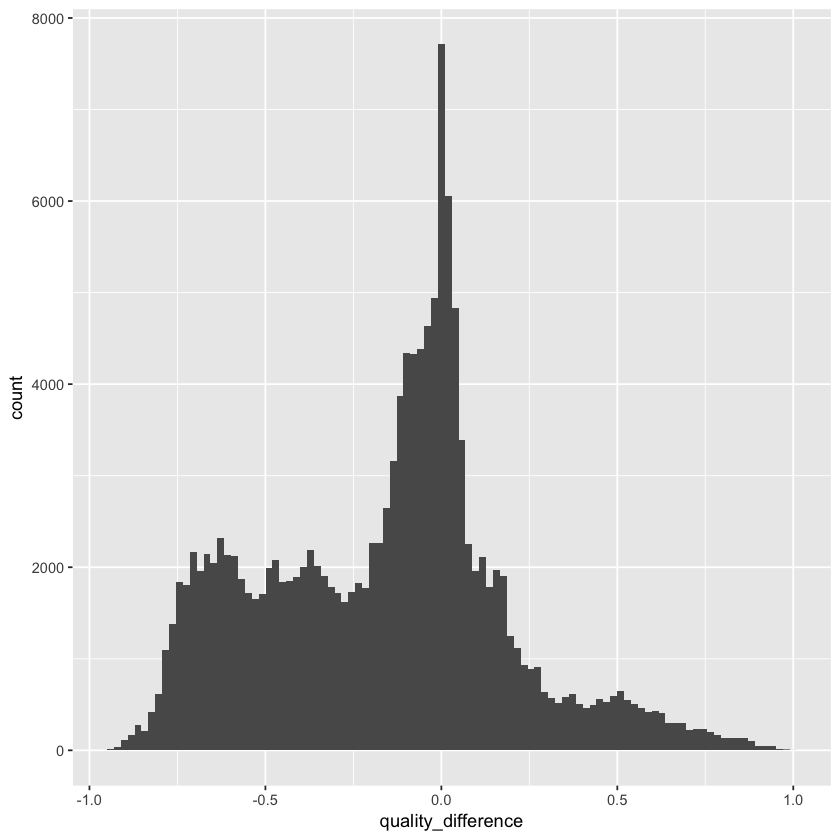

In [37]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

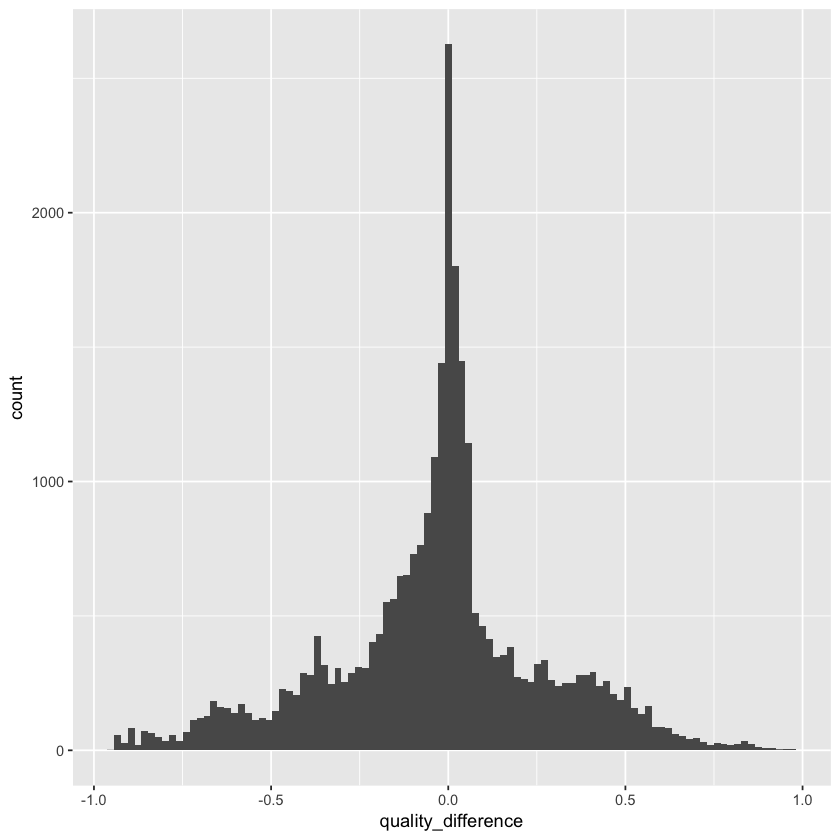

In [38]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

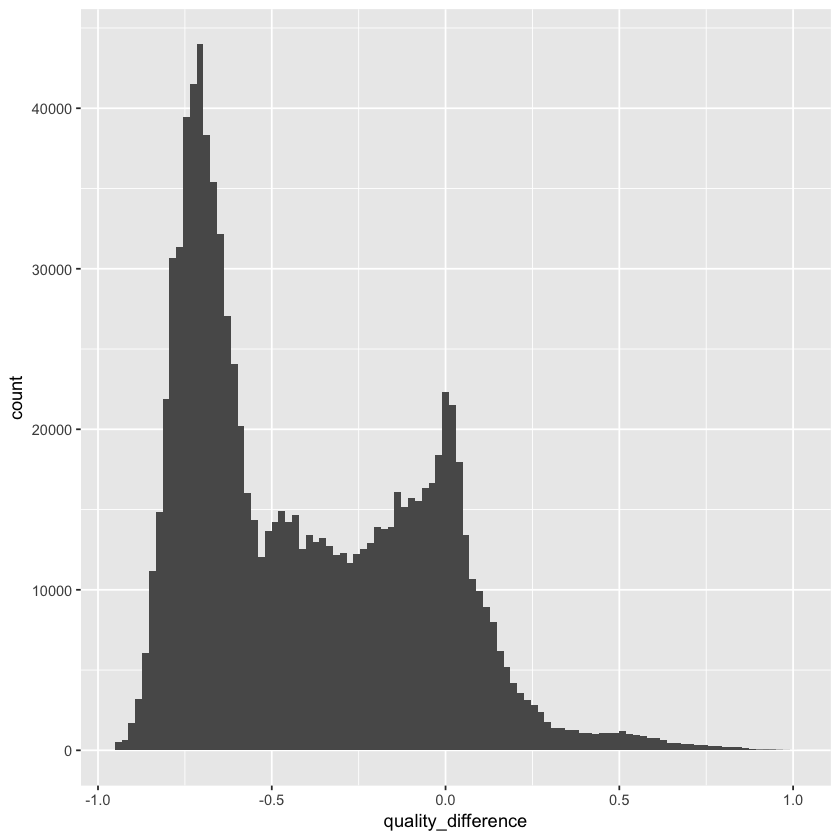

In [39]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

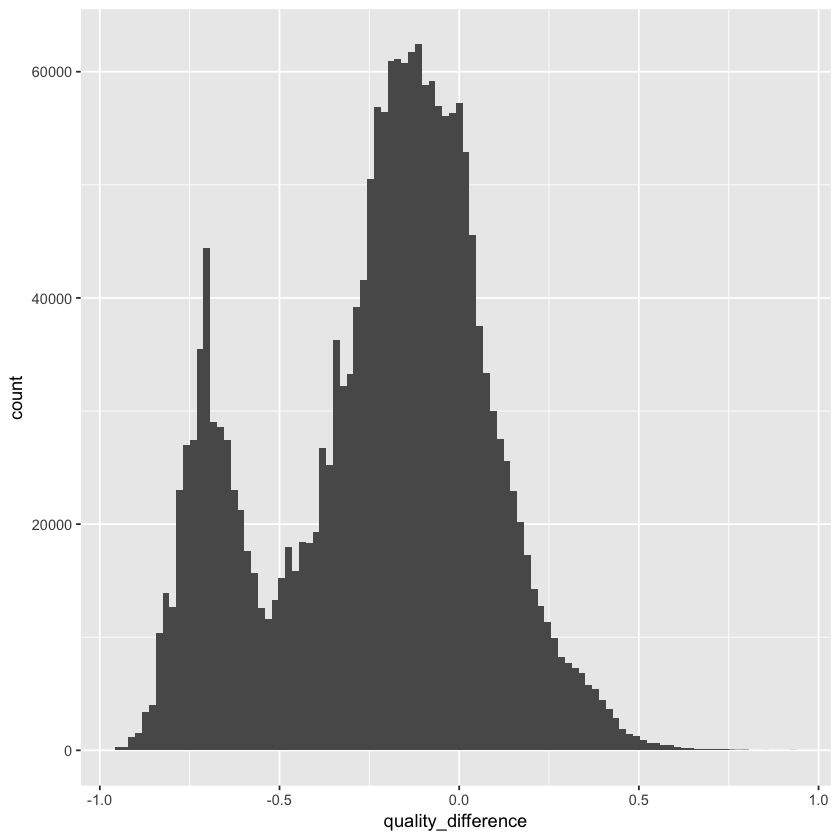

In [40]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

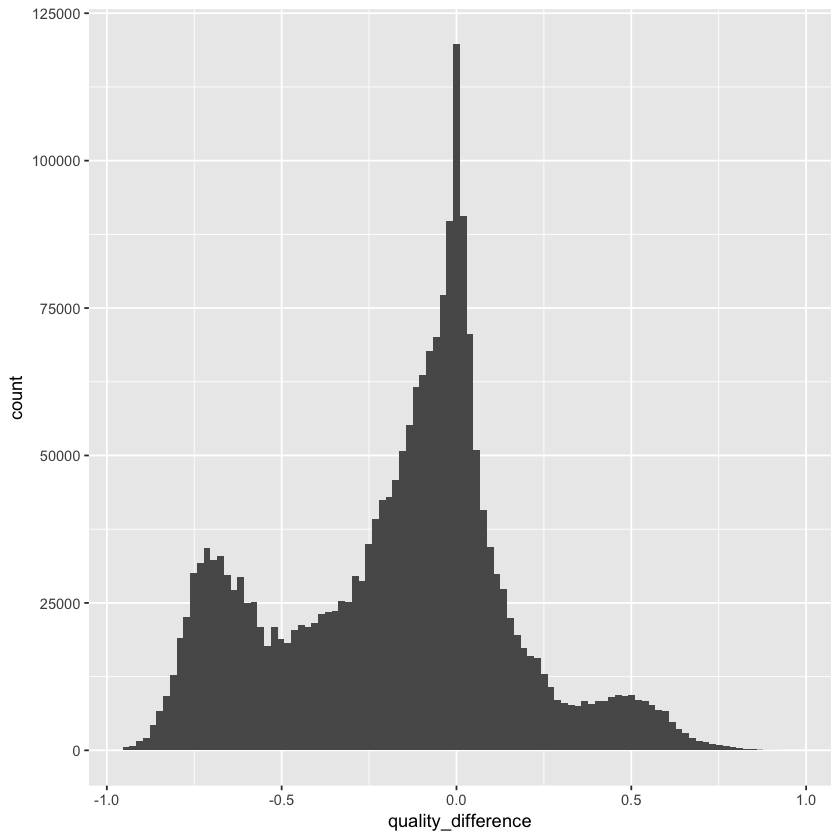

In [41]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

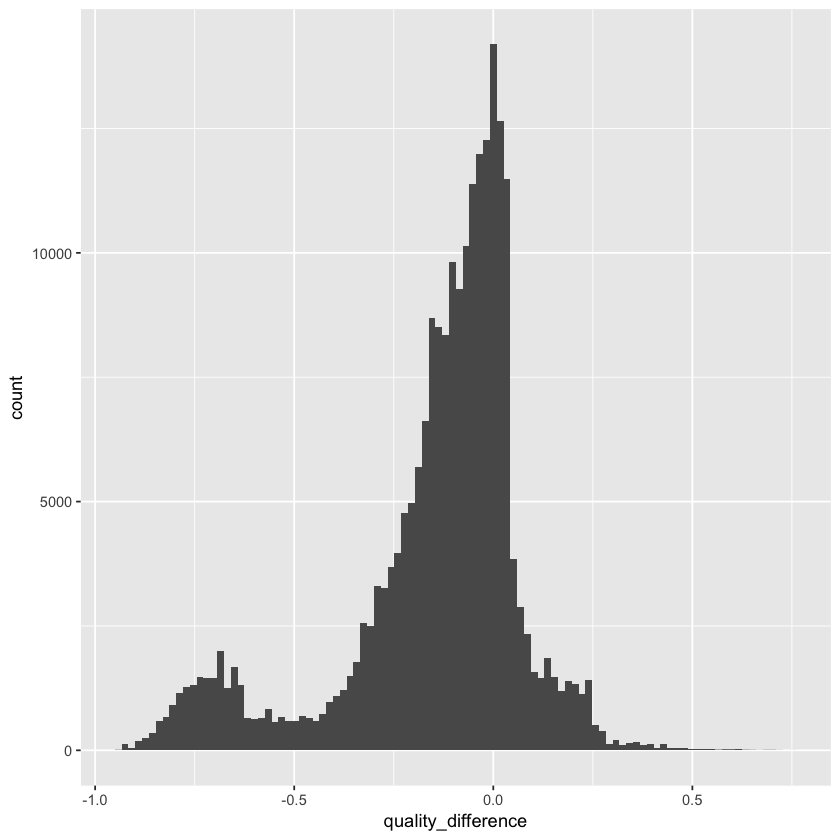

In [42]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

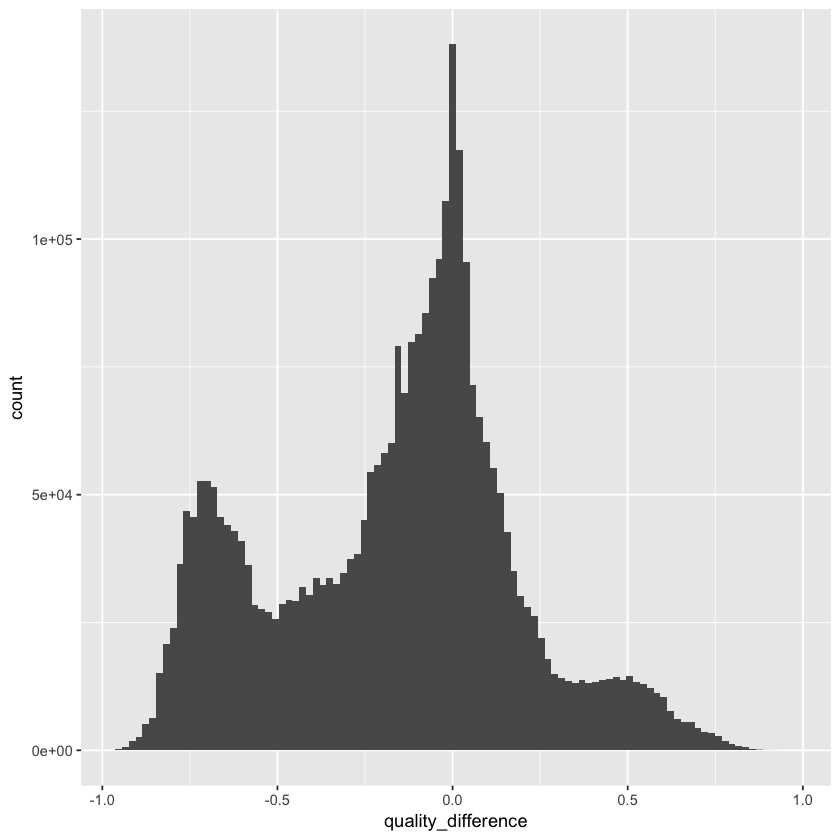

In [43]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

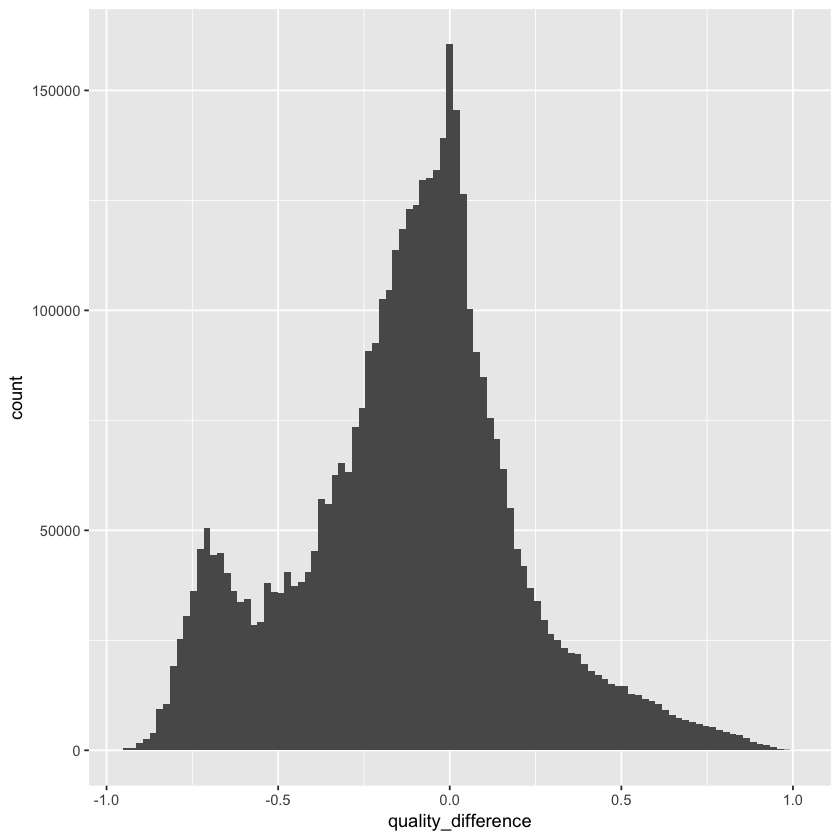

In [44]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'bot_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

## Semi-automated edits

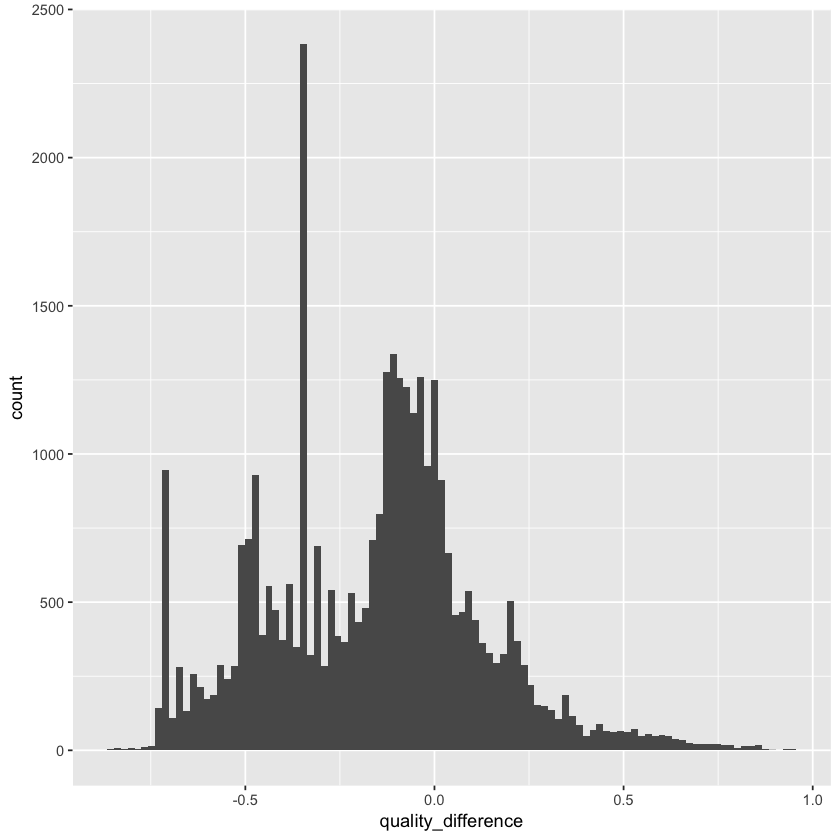

In [45]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

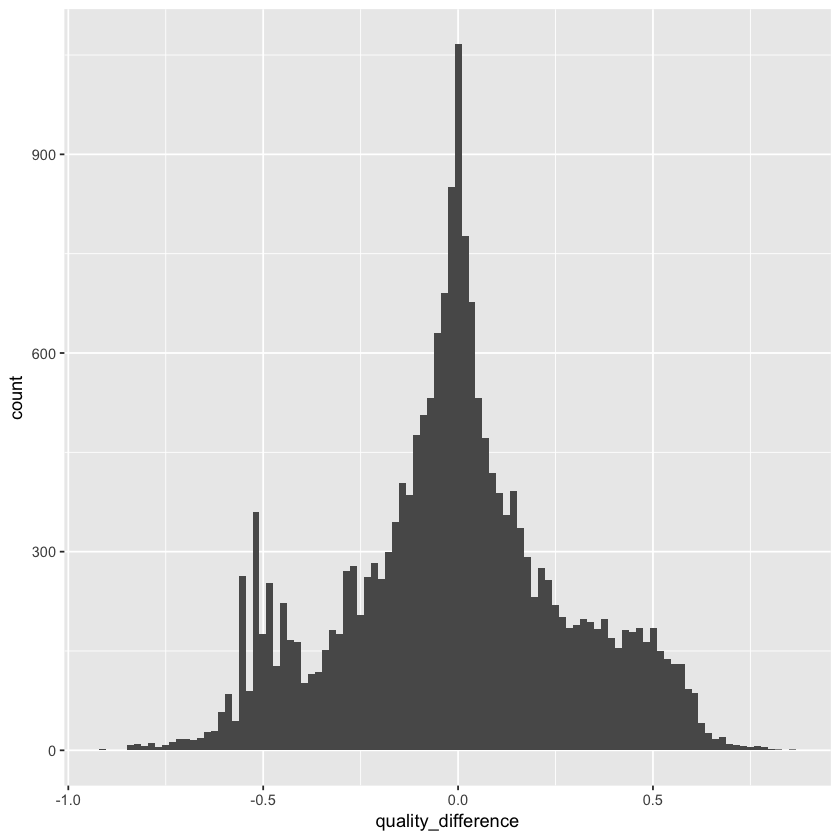

In [46]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

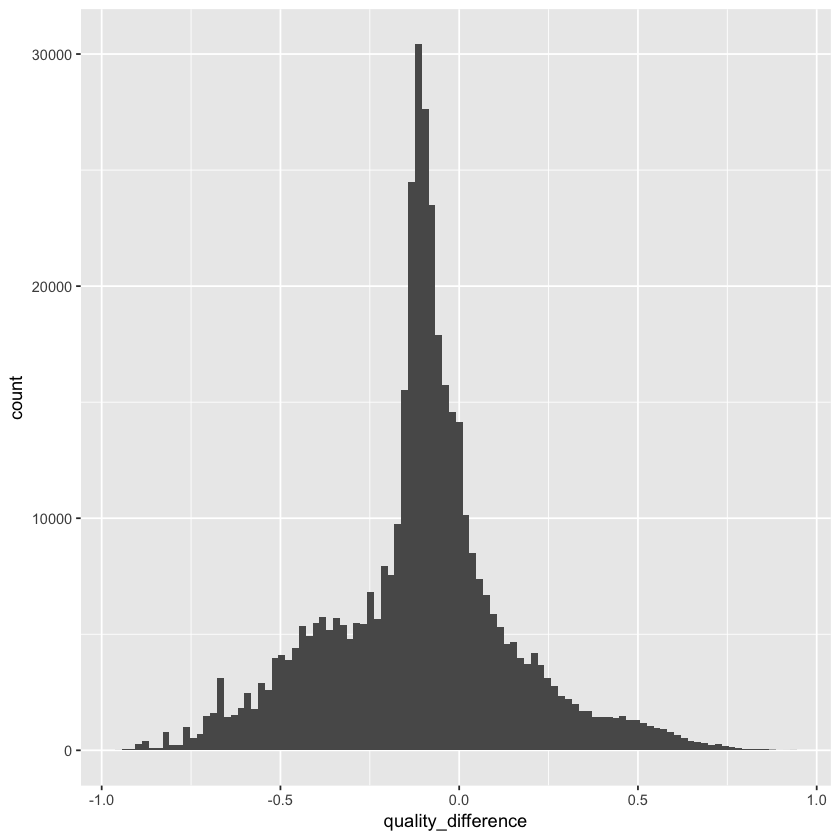

In [47]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

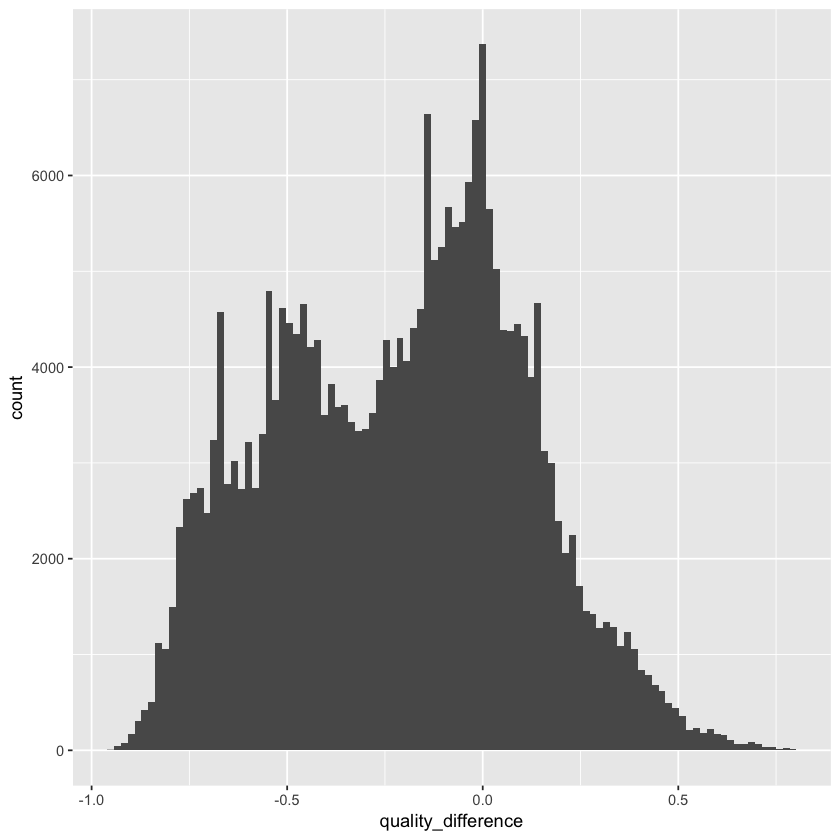

In [48]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

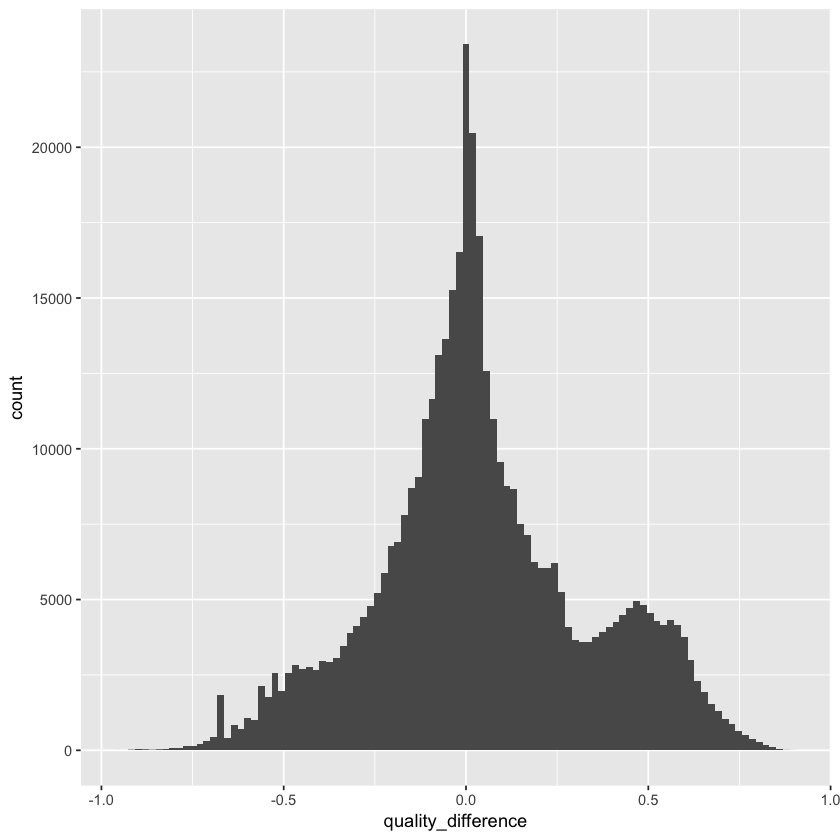

In [49]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

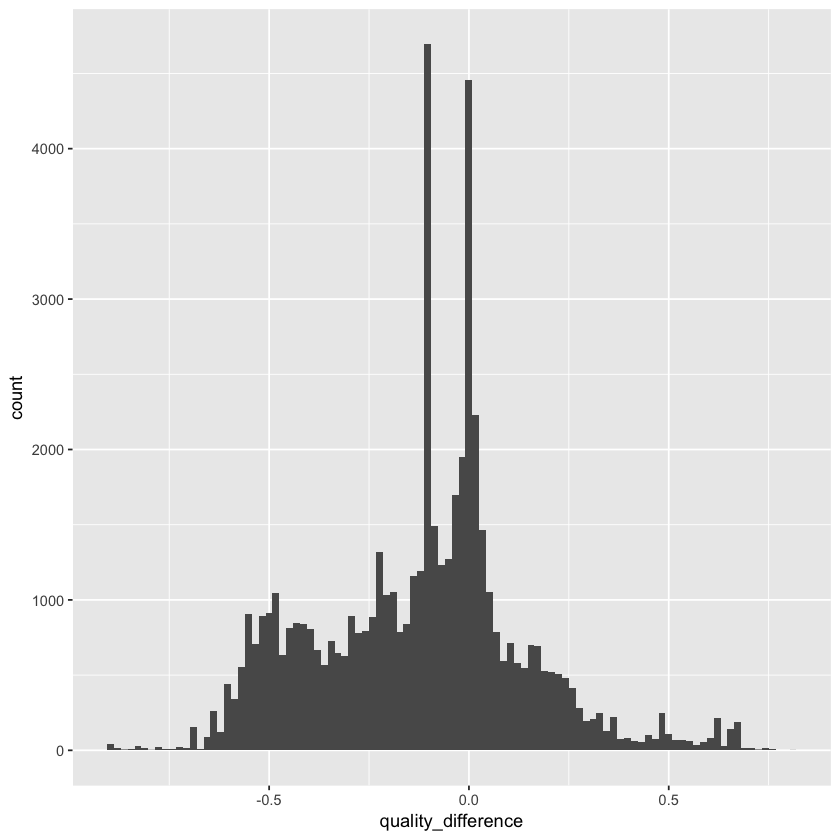

In [50]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

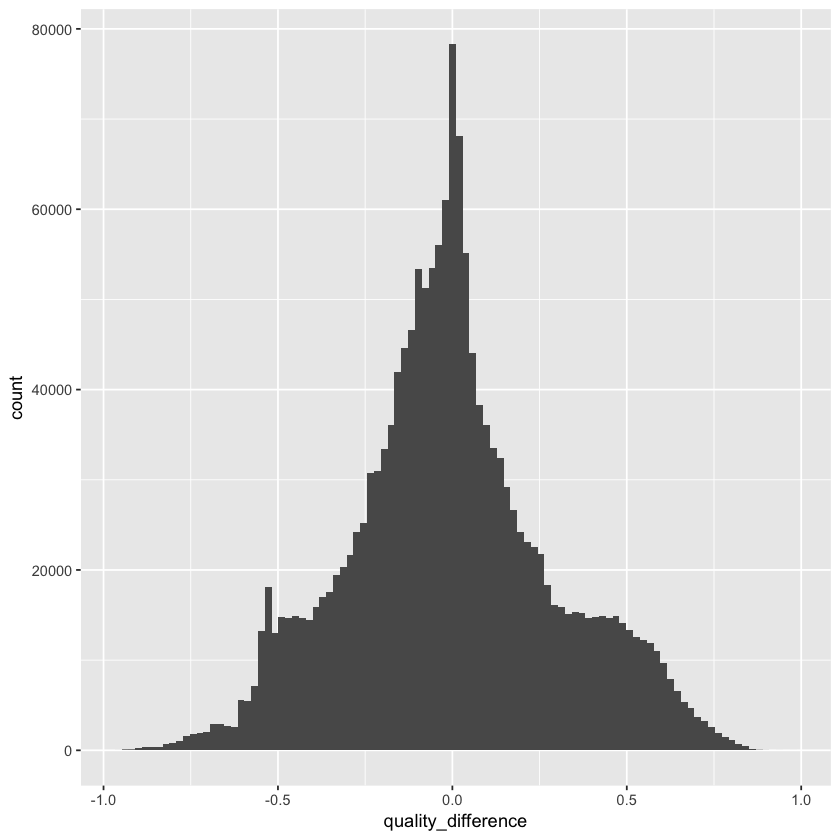

In [51]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

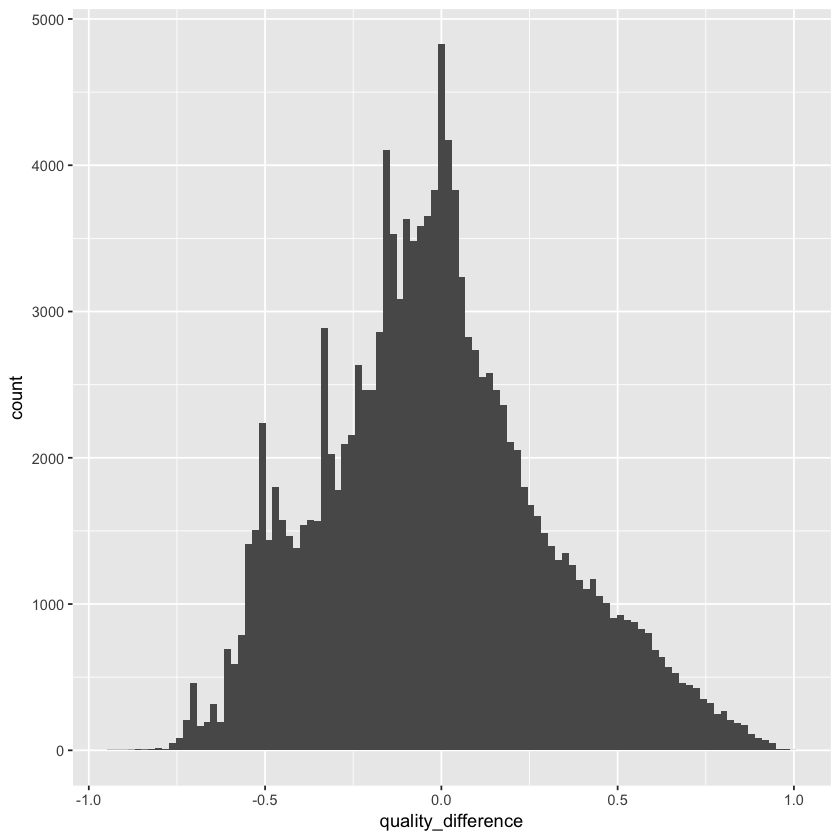

In [52]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'semi_automated_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

## Human edits

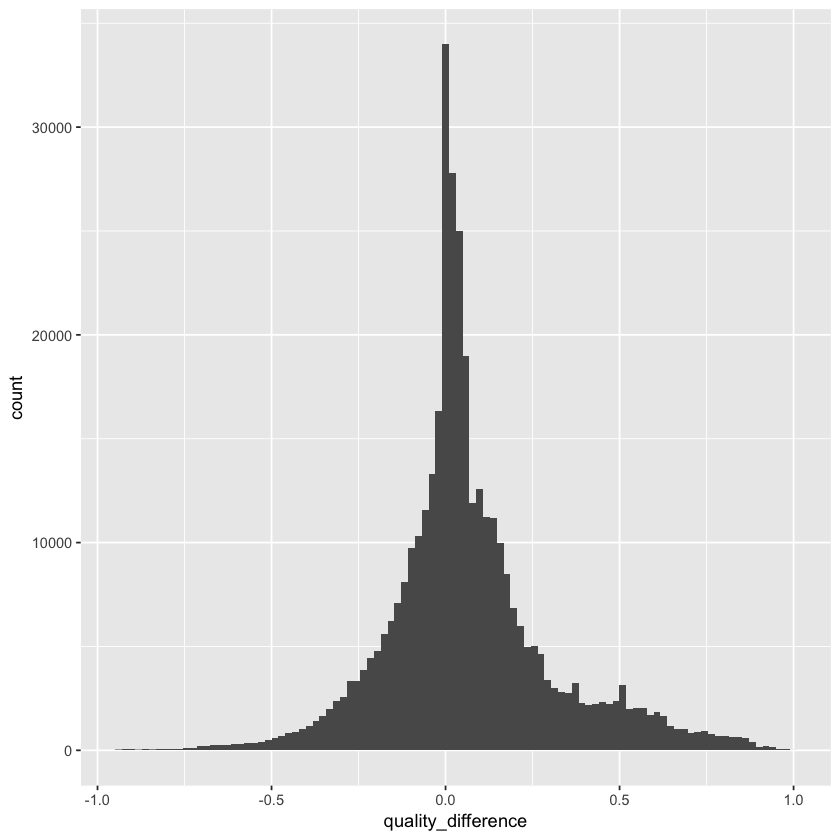

In [53]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

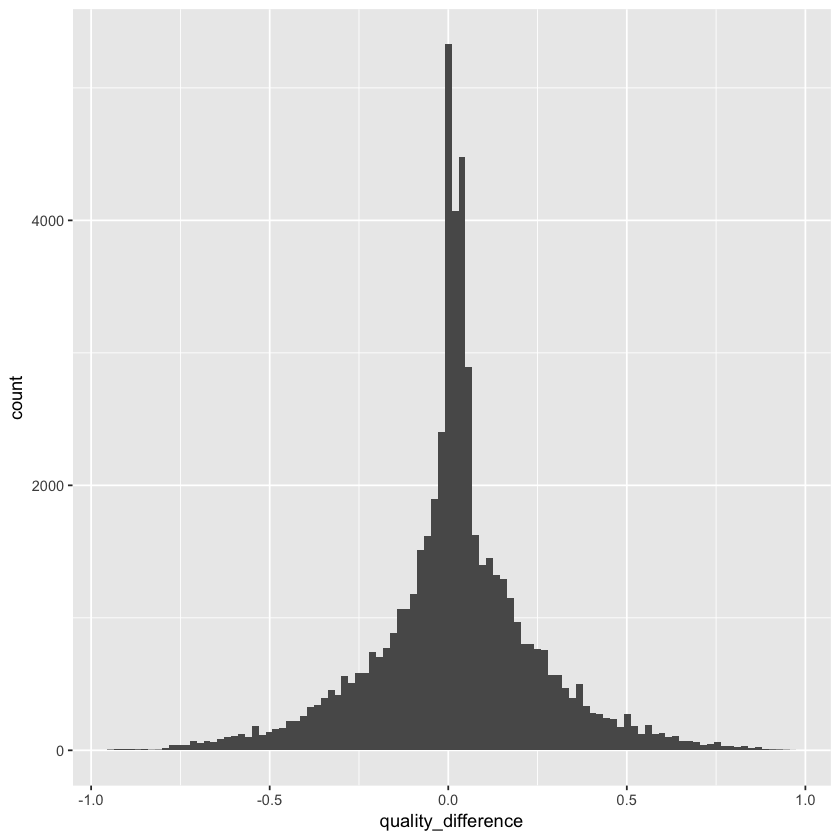

In [54]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

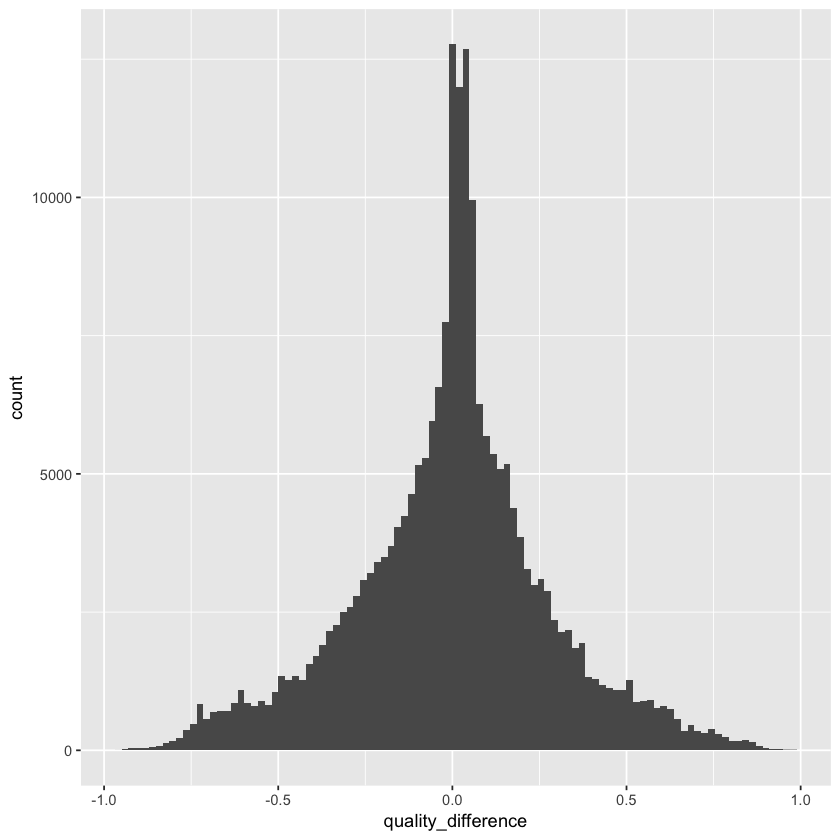

In [55]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

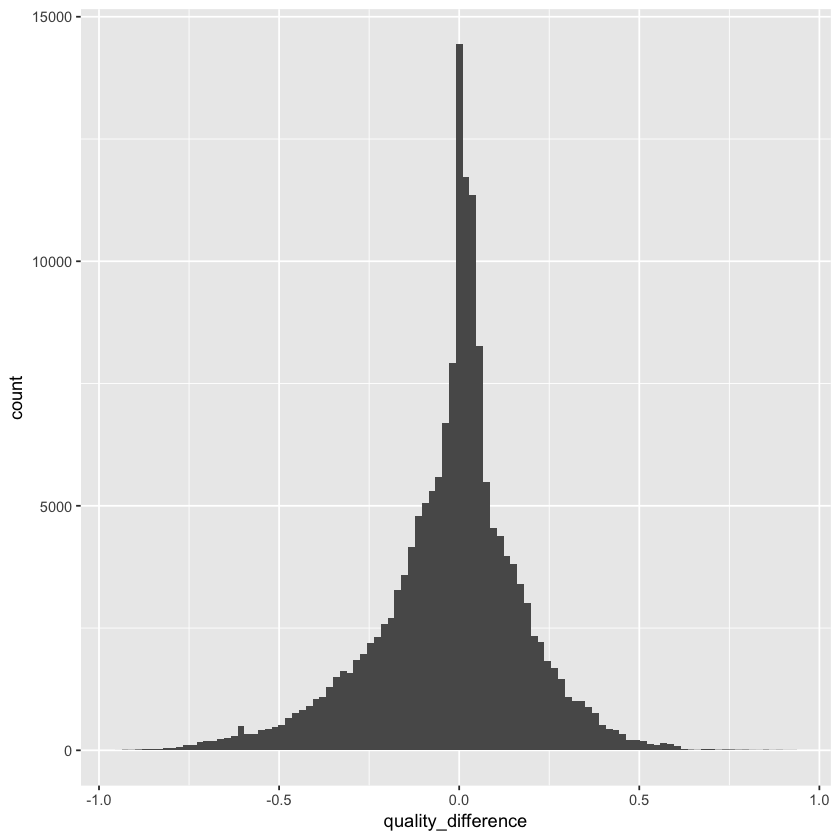

In [56]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

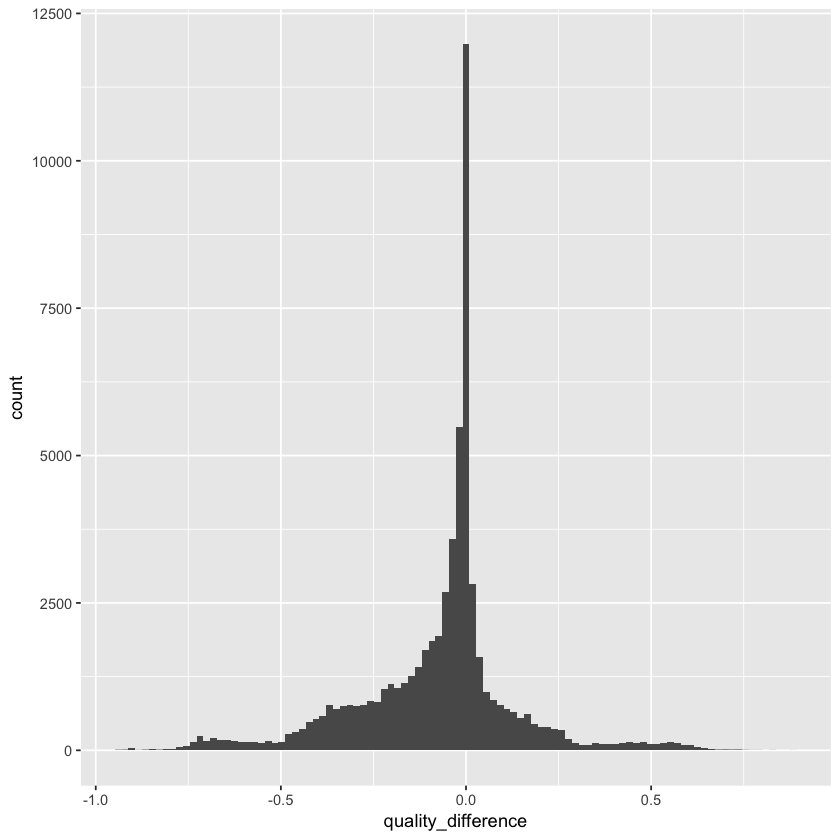

In [57]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

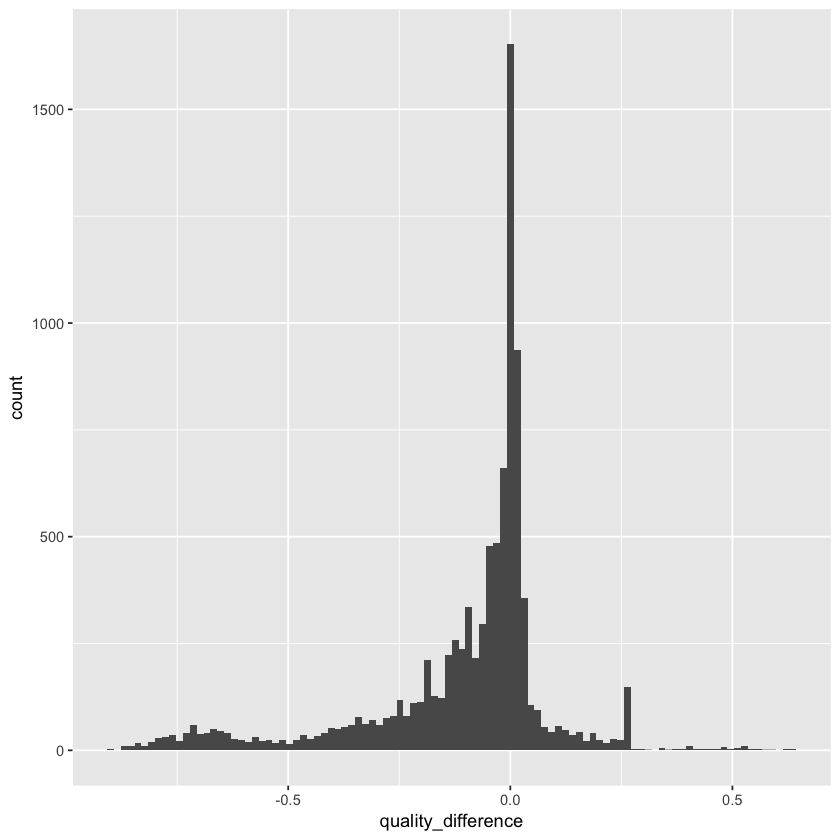

In [58]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

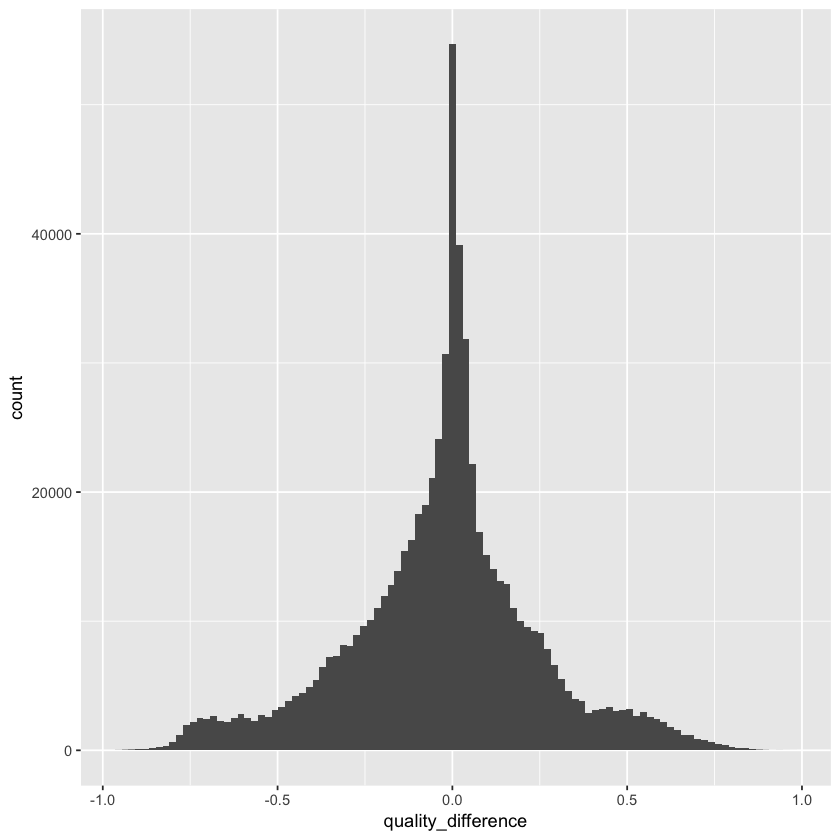

In [59]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

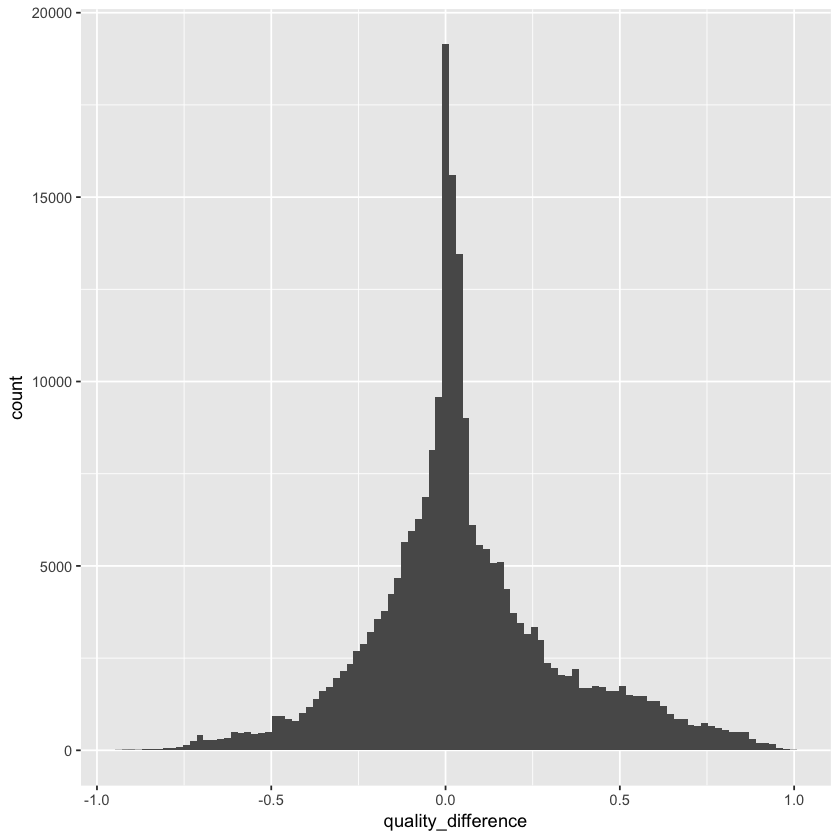

In [60]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'human_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

## Anon edits

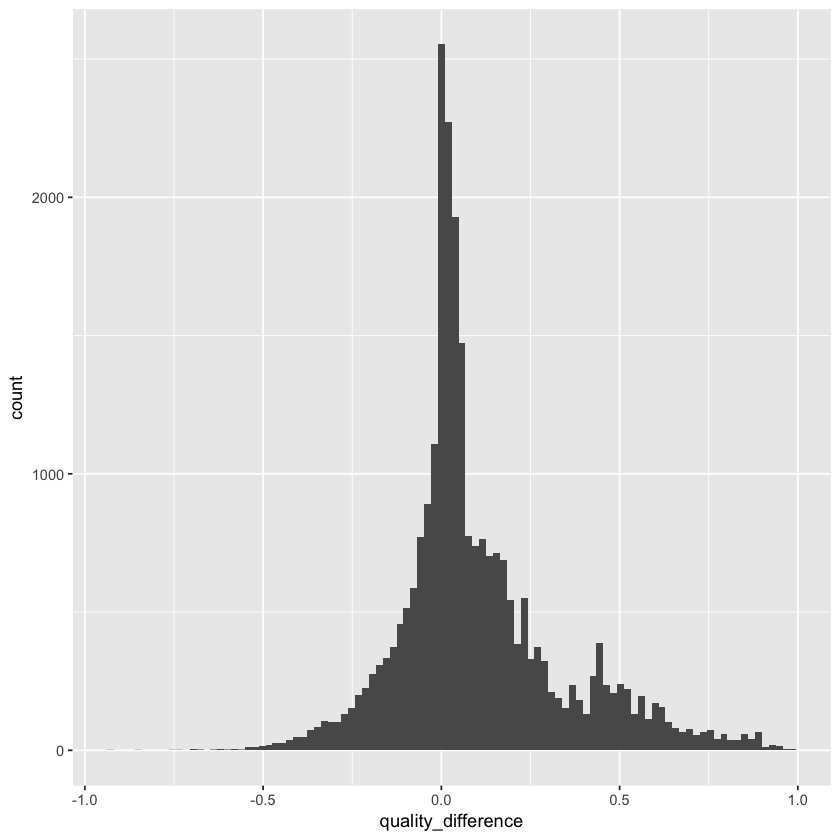

In [61]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'sitelink' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

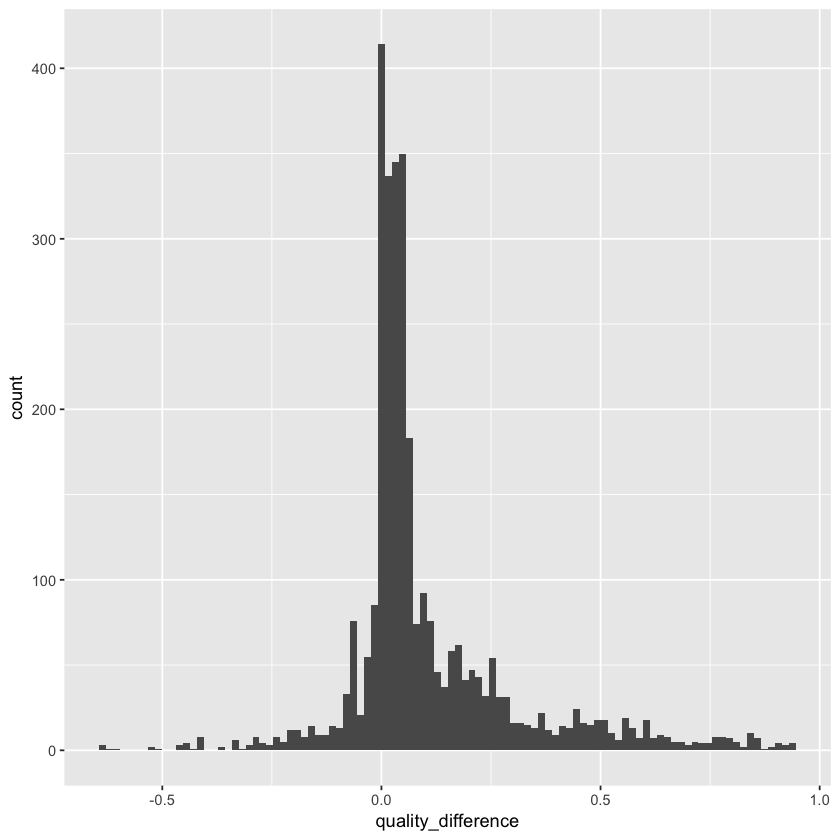

In [62]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'aliases' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

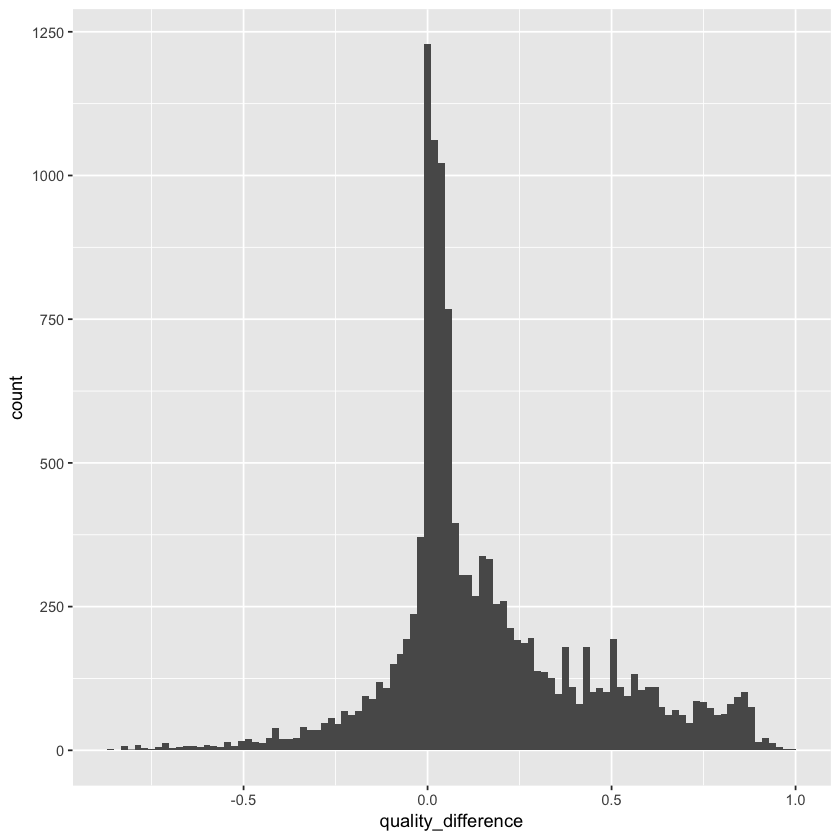

In [63]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'label' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

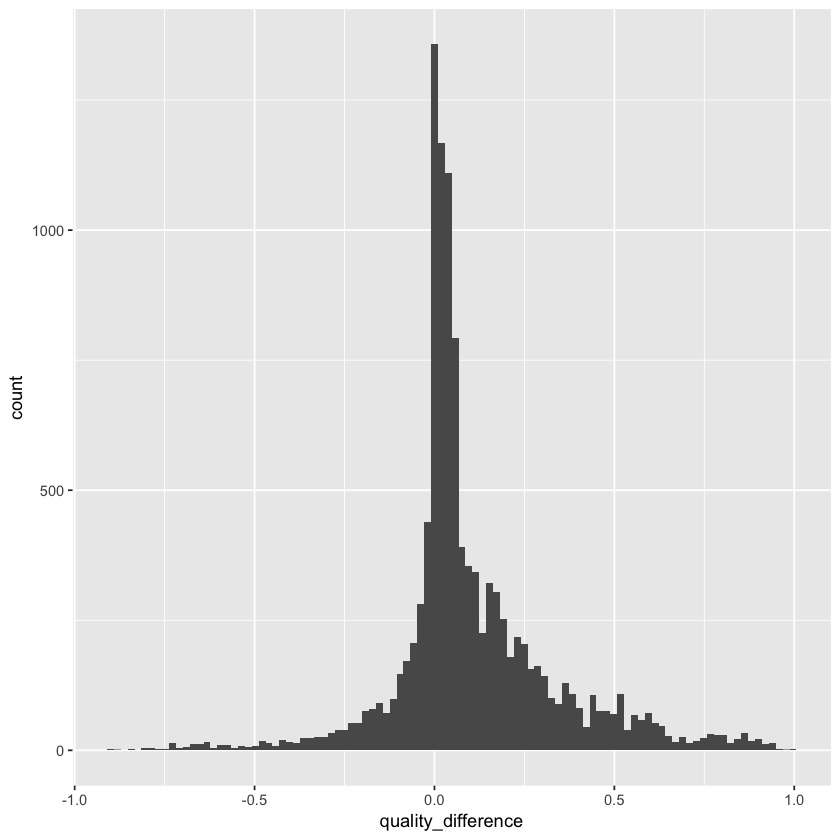

In [64]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'description' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

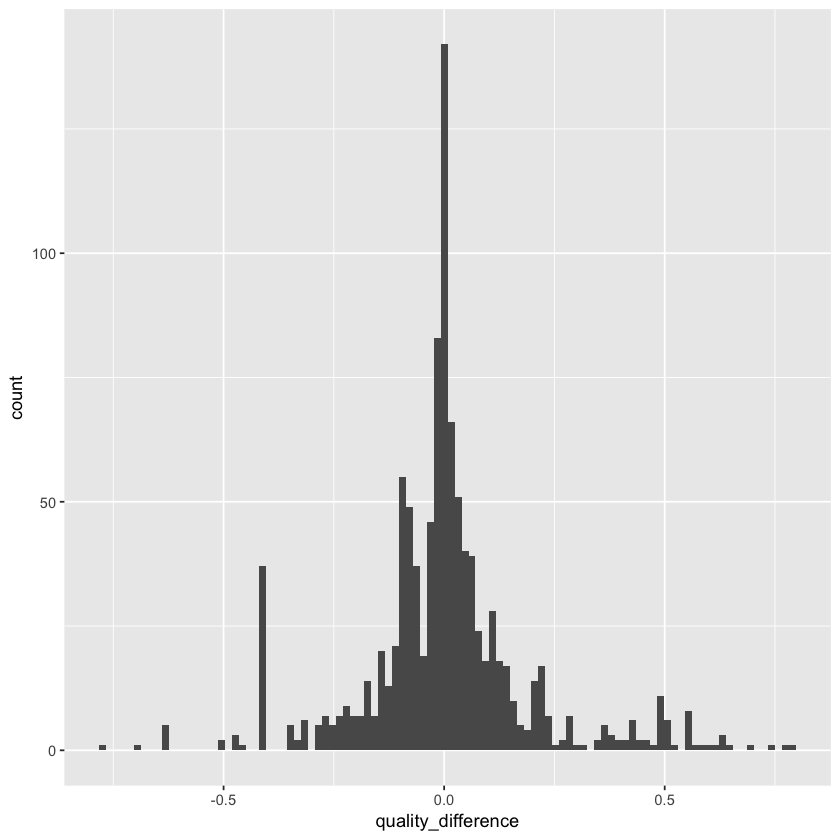

In [65]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'reference' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

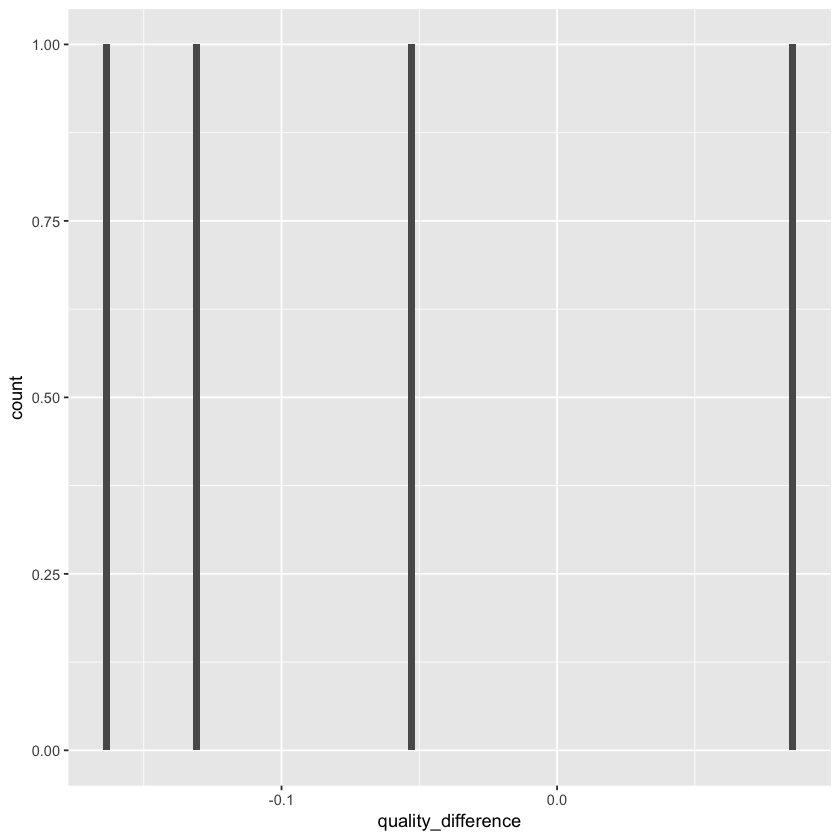

In [66]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'qualifier' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

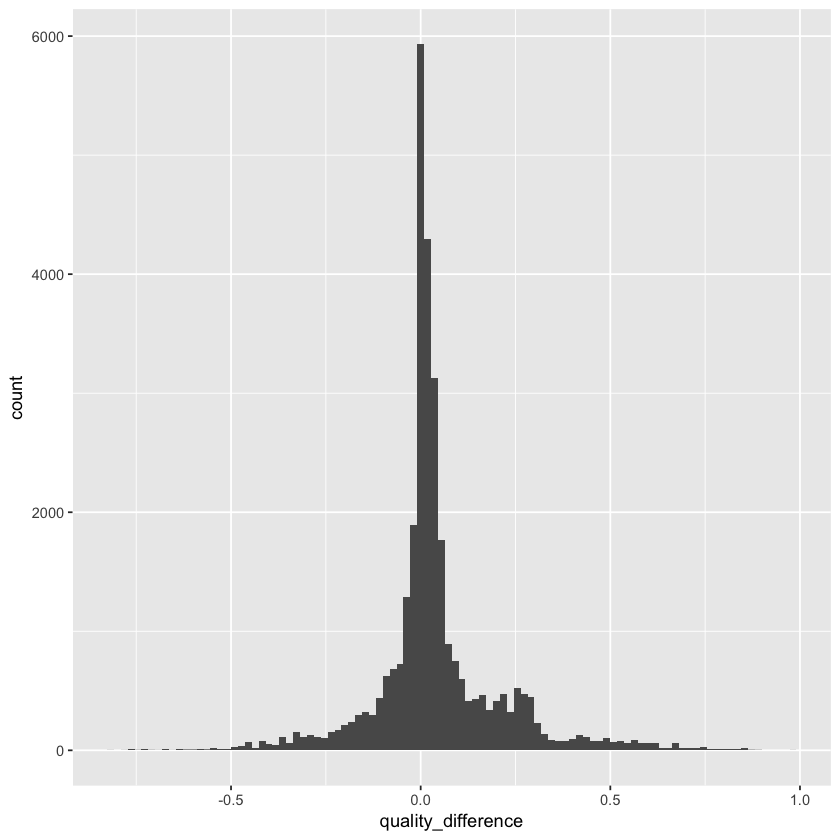

In [67]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'claim' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);

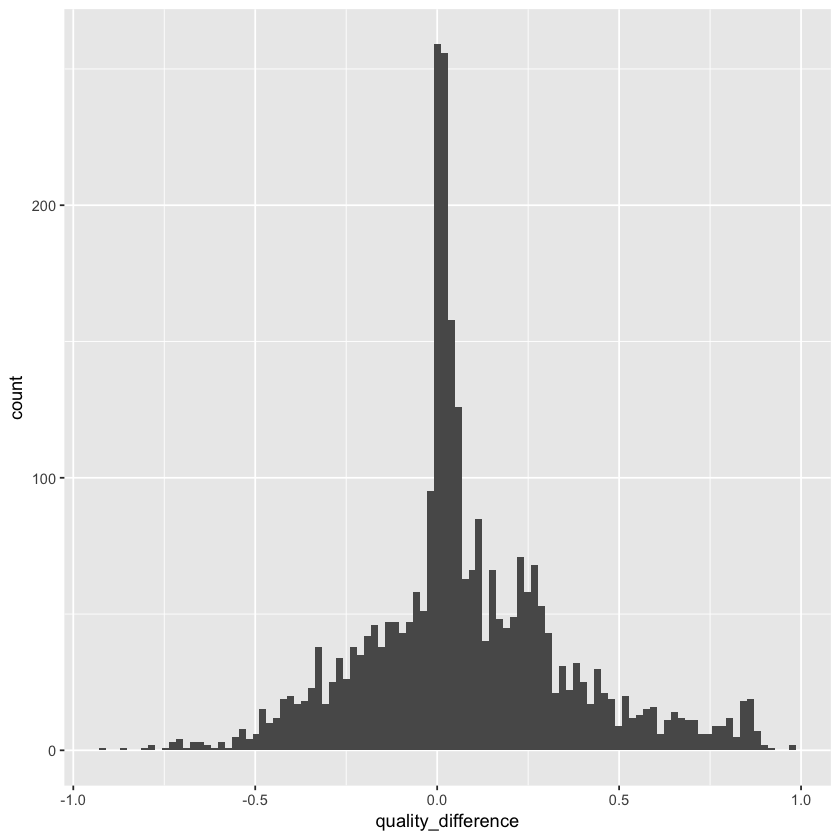

In [68]:
ggplot(revisions_weighted_sums_and_page_views[revisions_weighted_sums_and_page_views$edit_type == 'NULL' &
                                                                       revisions_weighted_sums_and_page_views$agent_type == 'anon_edit',],
       aes(x=quality_difference)) +
geom_histogram(bins=100);